In [14]:
from molecular_mpns.config import data_dir
from molecular_mpns.proto_molecule import Molecule
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# load data 
data_path = str(data_dir)
file = '/proto_mol_traj.npy'

traj = np.load(data_path + file)

# set up molecular environment 
N = 5
beta = 15.0
kb = 1.0
rb = 2.0
ka = 1.0
ra = np.pi/2
kd = np.array([[0.02, 3], [0.02, 2]])
mol = Molecule(N, beta, kb, rb, ka, ra, kd)

In [16]:
# sample points in trajectory
sample_size = 200000
random_idx = np.random.choice(traj.shape[0],sample_size)
samp_points = traj[random_idx,:]

# compute internal coordinates and potentials
IC,V = np.zeros((sample_size,9)),np.zeros(sample_size)

for i,x in enumerate(samp_points):
    v,ic = mol._potential(x),mol._internal_coordinates(x)
    V[i],IC[i,:] = v,ic

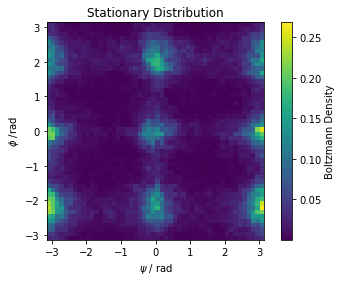

In [31]:
# plot potential in psi-phi space
phi,psi = IC[:,7],IC[:,8]

plt.hist2d(psi,phi,weights = np.exp(-beta*V),bins = 50, density = True)
plt.gca().set_aspect('equal')
plt.title('Stationary Distribution')
plt.xlabel('$\psi$ / rad')
plt.ylabel('$\phi$ /rad')
cb = plt.colorbar()
cb.set_label('Boltzmann Density')
plt.show()
plt.close()